In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from configlast import weather_api_keys

In [3]:
 # Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fd07ea5b3b26c8e5f496edf0ac0196


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 11

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 11 | linchuan
City not found. Skipping...
Processing Record 2 of Set 11 | punta arenas
Processing Record 3 of Set 11 | rikitea
Processing Record 4 of Set 11 | upernavik
Processing Record 5 of Set 11 | kavaratti
Processing Record 6 of Set 11 | port hedland
Processing Record 7 of Set 11 | georgetown
Processing Record 8 of Set 11 | college
Processing Record 9 of Set 11 | hualahuises
Processing Record 10 of Set 11 | ponta do sol
Processing Record 11 of Set 11 | baracoa
Processing Record 12 of Set 11 | bengkulu
Processing Record 13 of Set 11 | chokurdakh
Processing Record 14 of Set 11 | port hardy
Processing Record 15 of Set 11 | leningradskiy
Processing Record 16 of Set 11 | sorland
Processing Record 17 of Set 11 | blyth
Processing Record 18 of Set 11 | port macquarie
Processing Record 19 of Set 11 | kruisfontein
Processing Record 20 of Set 11 | guerrero negro
Processing Record 21 of Set 11 | goderich
Processing Record 22 of Set 11 | atuona
Processing Record 23 o

Processing Record 36 of Set 14 | grand river south east
City not found. Skipping...
Processing Record 37 of Set 14 | vestmanna
Processing Record 38 of Set 14 | mogadishu
Processing Record 39 of Set 14 | isangel
Processing Record 40 of Set 14 | santo antonio do sudoeste
Processing Record 41 of Set 14 | marzuq
Processing Record 42 of Set 14 | mahibadhoo
Processing Record 43 of Set 14 | olinda
Processing Record 44 of Set 14 | casa grande
Processing Record 45 of Set 14 | governador dix-sept rosado
Processing Record 46 of Set 14 | olafsvik
Processing Record 47 of Set 14 | the pas
Processing Record 48 of Set 14 | kavieng
Processing Record 49 of Set 14 | yarada
Processing Record 50 of Set 14 | azad shahr
Processing Record 1 of Set 15 | pahrump
Processing Record 2 of Set 15 | pandan
Processing Record 3 of Set 15 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 15 | zhanaozen
Processing Record 5 of Set 15 | blenheim
Processing Record 6 of Set 15 | attawapiskat
City not found

Processing Record 21 of Set 18 | katsiveli
City not found. Skipping...
Processing Record 22 of Set 18 | deputatskiy
Processing Record 23 of Set 18 | kasongo-lunda
Processing Record 24 of Set 18 | sola
Processing Record 25 of Set 18 | galesong
Processing Record 26 of Set 18 | ayni
Processing Record 27 of Set 18 | mrirt
City not found. Skipping...
Processing Record 28 of Set 18 | corinto
Processing Record 29 of Set 18 | vilcun
Processing Record 30 of Set 18 | kharp
Processing Record 31 of Set 18 | aquiraz
Processing Record 32 of Set 18 | xining
Processing Record 33 of Set 18 | touros
Processing Record 34 of Set 18 | bargal
City not found. Skipping...
Processing Record 35 of Set 18 | klyuchi
Processing Record 36 of Set 18 | chicama
Processing Record 37 of Set 18 | chebsara
Processing Record 38 of Set 18 | belyy yar
Processing Record 39 of Set 18 | puerto escondido
Processing Record 40 of Set 18 | lata
Processing Record 41 of Set 18 | novosemeykino
Processing Record 42 of Set 18 | ketterin

Processing Record 6 of Set 22 | adrar
Processing Record 7 of Set 22 | sistranda
Processing Record 8 of Set 22 | andrews
Processing Record 9 of Set 22 | lengede
Processing Record 10 of Set 22 | nishihara
Processing Record 11 of Set 22 | ustye
Processing Record 12 of Set 22 | lima
Processing Record 13 of Set 22 | walvis bay
Processing Record 14 of Set 22 | zabol
Processing Record 15 of Set 22 | namatanai
Processing Record 16 of Set 22 | najran
Processing Record 17 of Set 22 | turukhansk
Processing Record 18 of Set 22 | cuamba
Processing Record 19 of Set 22 | shakawe
Processing Record 20 of Set 22 | nuevo progreso
Processing Record 21 of Set 22 | tazovskiy
Processing Record 22 of Set 22 | bolu
Processing Record 23 of Set 22 | bambous virieux
Processing Record 24 of Set 22 | pisco
Processing Record 25 of Set 22 | sisimiut
Processing Record 26 of Set 22 | ulladulla
Processing Record 27 of Set 22 | marcona
City not found. Skipping...
Processing Record 28 of Set 22 | lushunkou
City not found.

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[['City', 'Country', 'Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,55.42,62,75,16.11,CL,2021-09-24 20:52:10
1,Rikitea,-23.1203,-134.9692,73.83,81,100,23.09,PF,2021-09-24 20:52:10
2,Upernavik,72.7868,-56.1549,24.66,86,84,4.59,GL,2021-09-24 20:52:10
3,Kavaratti,10.5669,72.6420,81.66,78,94,13.91,IN,2021-09-24 20:52:10
4,Port Hedland,-20.3167,118.5667,60.85,100,90,0.00,AU,2021-09-24 20:52:11
5,Georgetown,5.4112,100.3354,81.90,91,20,1.99,MY,2021-09-24 20:48:21
6,College,64.8569,-147.8028,35.29,87,90,4.61,US,2021-09-24 20:51:26
7,Hualahuises,24.8847,-99.6733,84.36,49,55,6.02,MX,2021-09-24 20:52:11
8,Ponta Do Sol,32.6667,-17.1000,72.23,72,20,3.36,PT,2021-09-24 20:52:12
9,Baracoa,20.3467,-74.4958,83.64,77,61,4.43,CU,2021-09-24 20:52:12


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

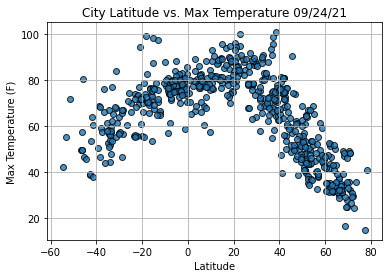

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

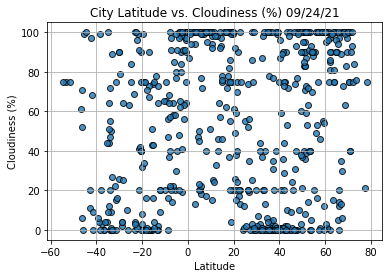

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()